In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
df = pd.read_excel('BankFullUpdated.xlsx') 

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#No. of rows and cols
df.shape

(45211, 17)

In [5]:
# Missing values checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# No missing values present in the dataset

## Visualize the distribution of the target variable.

In [6]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
19008,48,technician,married,secondary,no,1600,no,no,cellular,5,aug,117,1,-1,0,unknown,no
41393,25,services,single,secondary,no,162,yes,no,cellular,1,sep,531,2,-1,0,unknown,yes
18431,42,services,single,secondary,no,247,yes,no,cellular,31,jul,114,2,-1,0,unknown,no
38927,28,admin.,single,secondary,no,2290,yes,no,cellular,18,may,2301,1,-1,0,unknown,yes
17063,51,technician,married,secondary,no,18,no,yes,cellular,25,jul,363,6,-1,0,unknown,no


In [7]:
#Missing values checking 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [10]:
#Duplicated values 
df.duplicated().sum()

0

In [11]:
#Correlation between columns
#df.corr()['duration']
df.corr()

/var/folders/yz/6pc3ydrs64358k175b9gygtm0000gn/T/ipykernel_2143/2537774943.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


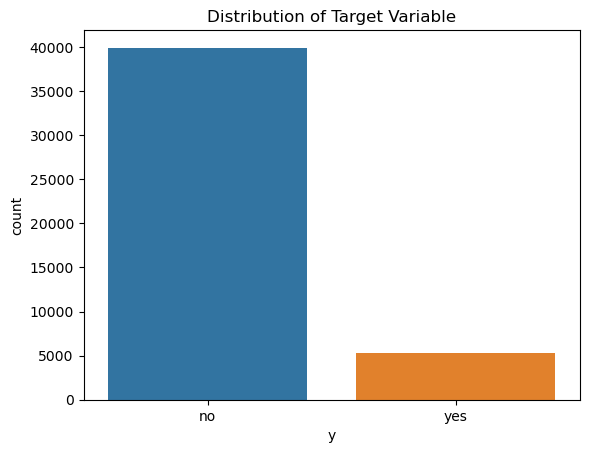

In [12]:
# Visualize the distribution of the target variable
sns.countplot(data=df, x='y')
plt.title("Distribution of Target Variable")
plt.show()


### Exploratory Data Analysis
1. Find Unwanted Columns
2. Find Missing Values
3. Find Features with one value
4. Explore the Categorical Features
5. Find Categorical Feature Distribution
6. Relationship between Categorical Features and Label
7. Explore the Numerical Features
8. Find Discrete Numerical Features
9. Relation between Discrete numerical Features and Labels
10. Find Continous Numerical Features
11. Distribution of Continous Numerical Features
12. Relation between Continous numerical Features and Labels
13. Find Outliers in numerical features
14. Explore the Correlation between numerical features
15. Find Pair Plot
16. Check the Data set is balanced or not based on target values in classification

#### 1. No unwanted columns. 
#### 2. No missing values are found in the dataset. 

In [13]:
# 3. Find features with one value

for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


#### 3. No colums features with one value

In [14]:
# Explore the catagorical features 

categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


#### 4. Nine catagorical colums && feature job = 12 and month = 12 has highest number of catagories. 

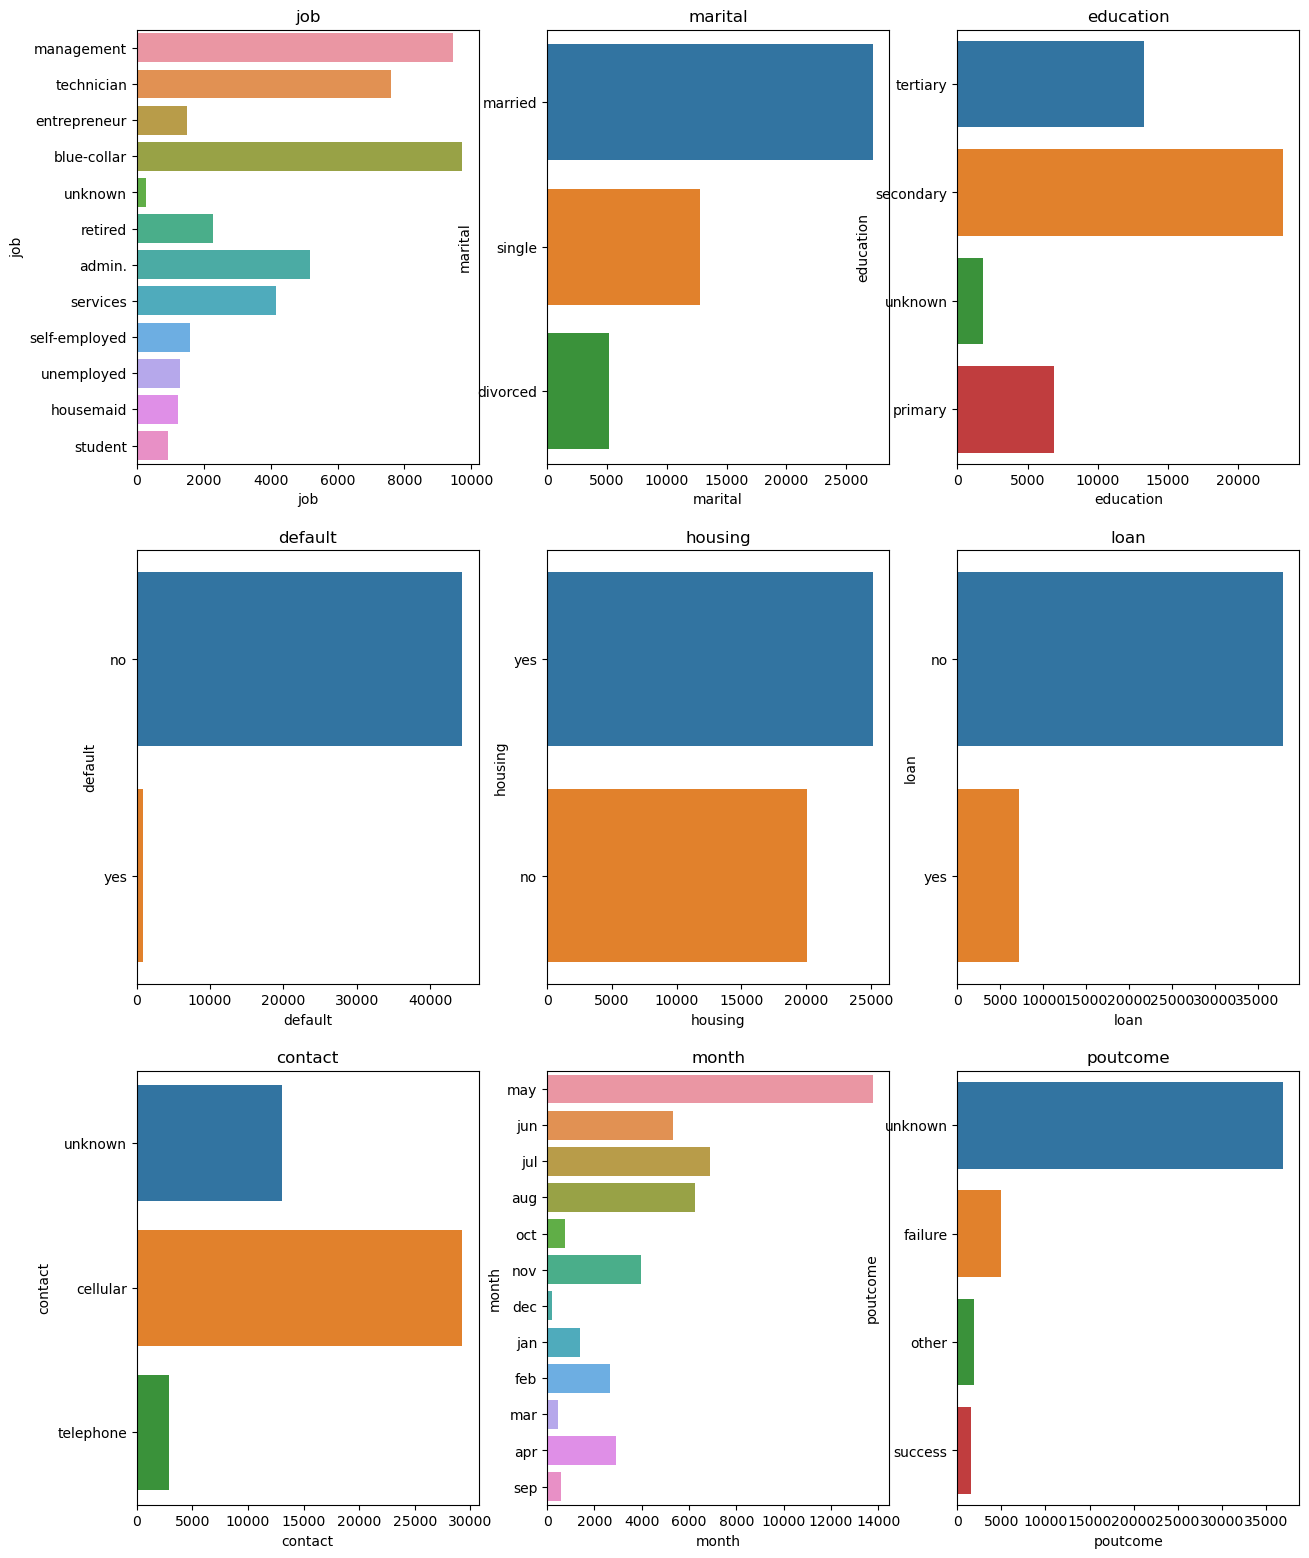

In [16]:
# 5. check count based on categorical features

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**My findings**:
- job type blue-collar records are high and student are very less 
- married peoples are high in records and divorced are less
- education background secondary are in high numbers
- deafult feature will be dropped in the feature engn. as it has most of of the values are 'No'
- clients with personal loan is very less than without personal loan.
- most of the cliets contacts are celluar.
- data in month of may is high and less in dec
- housing seems okay. 

**6. Relationship between Categorical Features and Label**


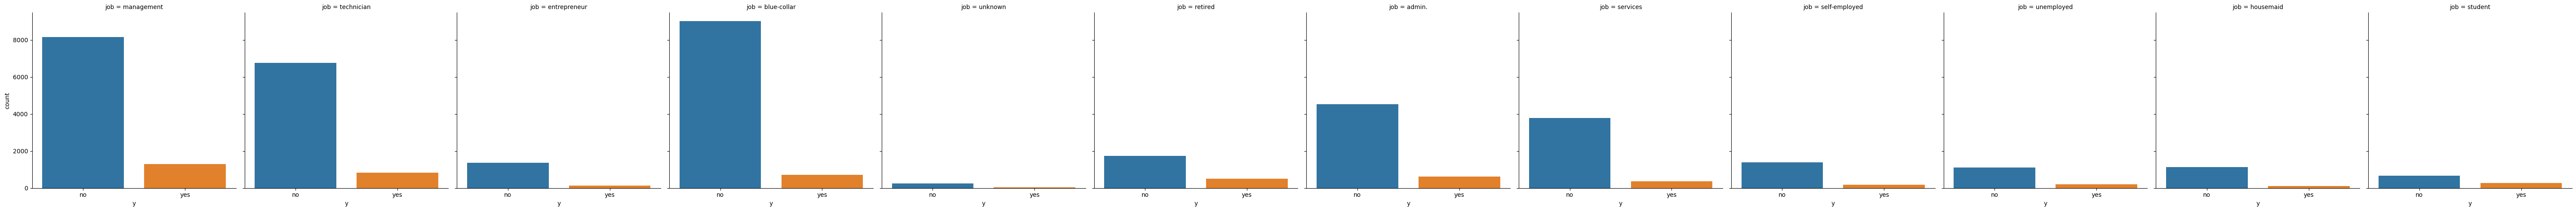

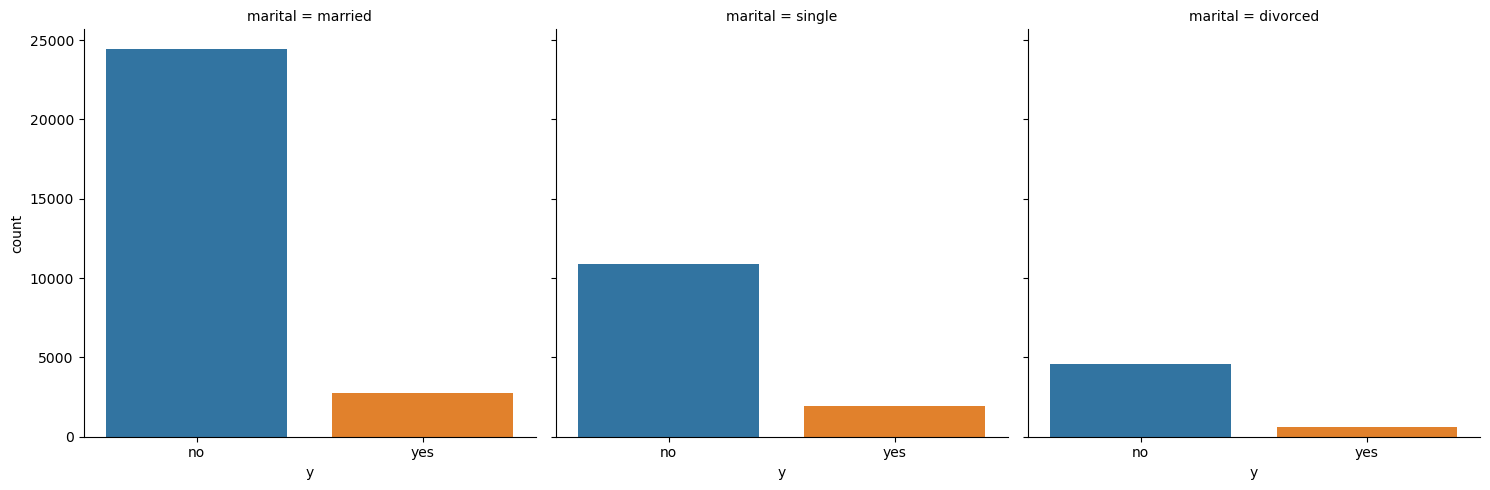

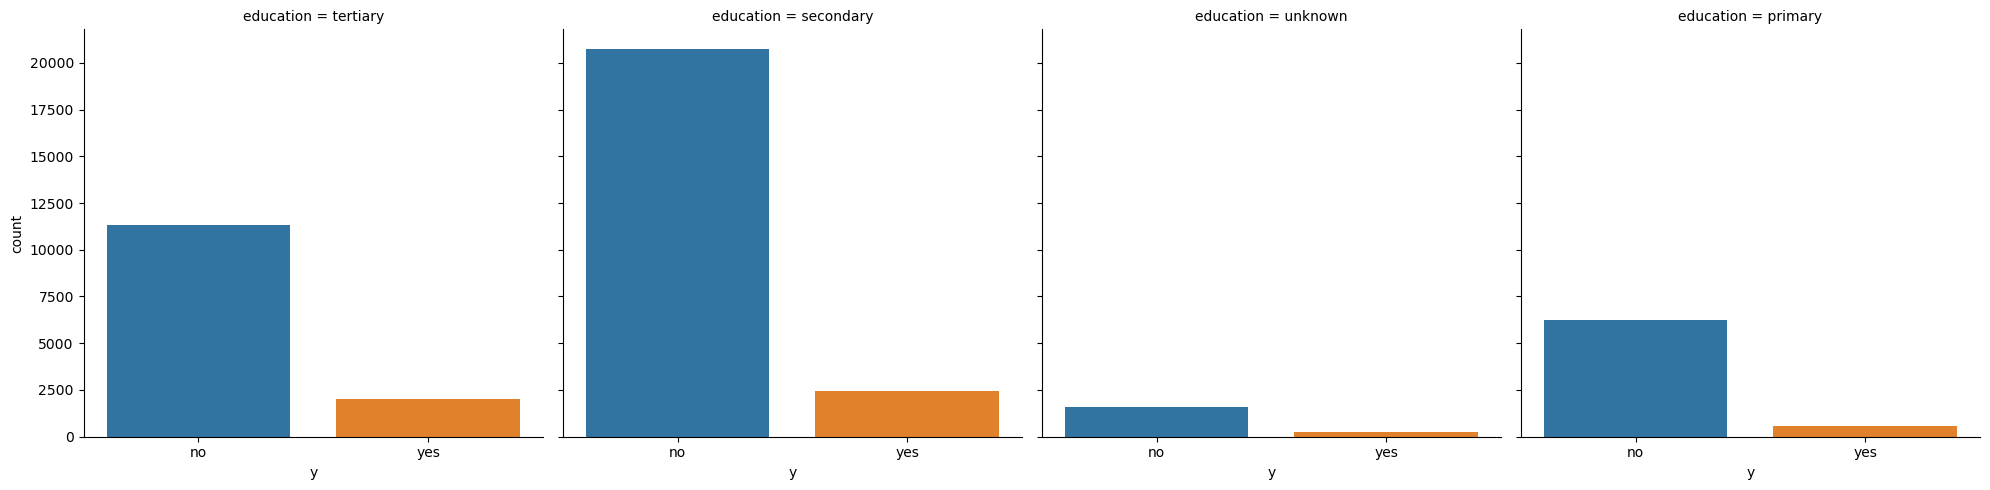

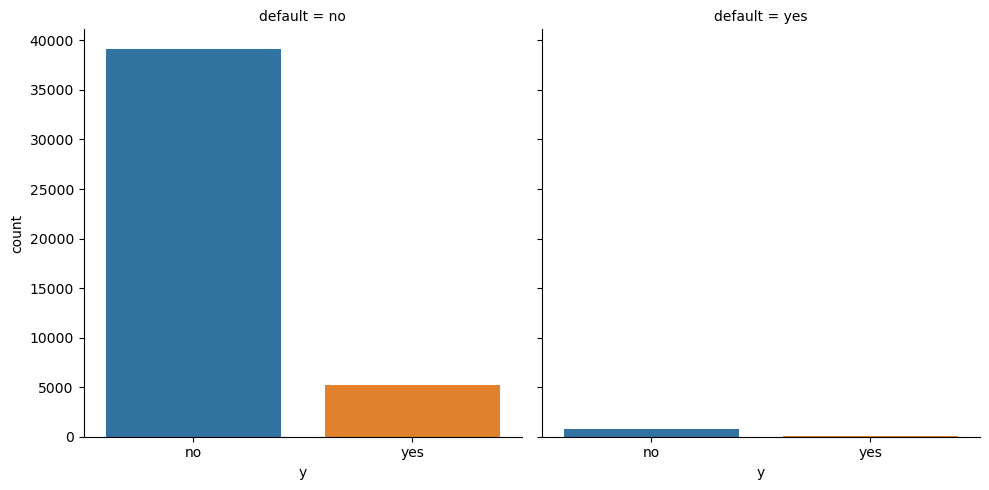

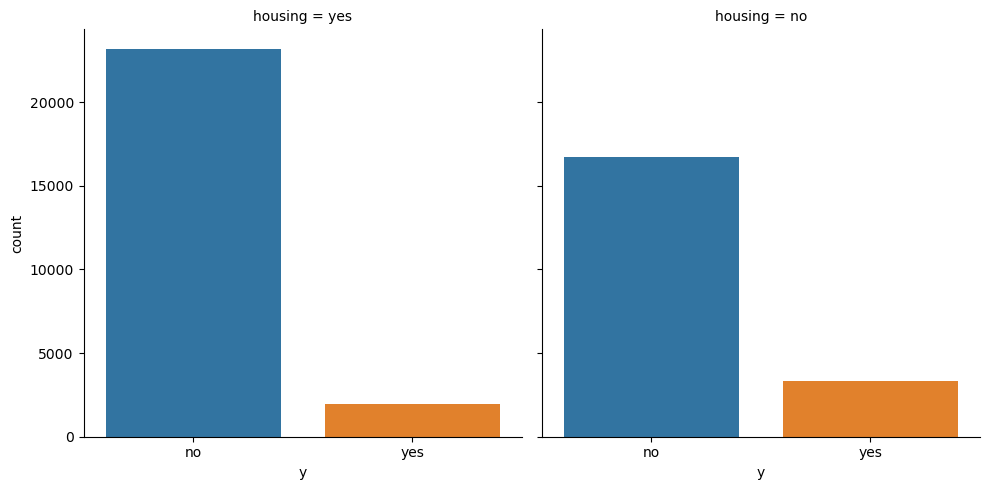

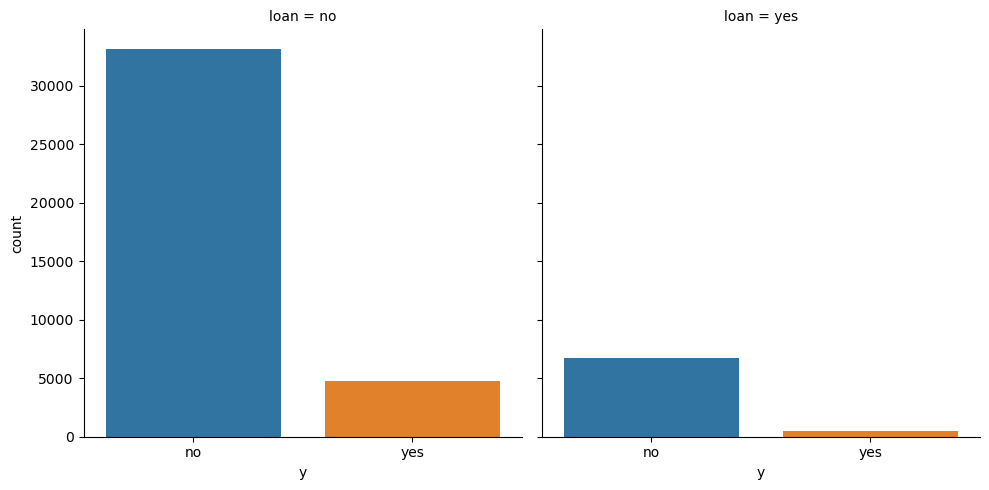

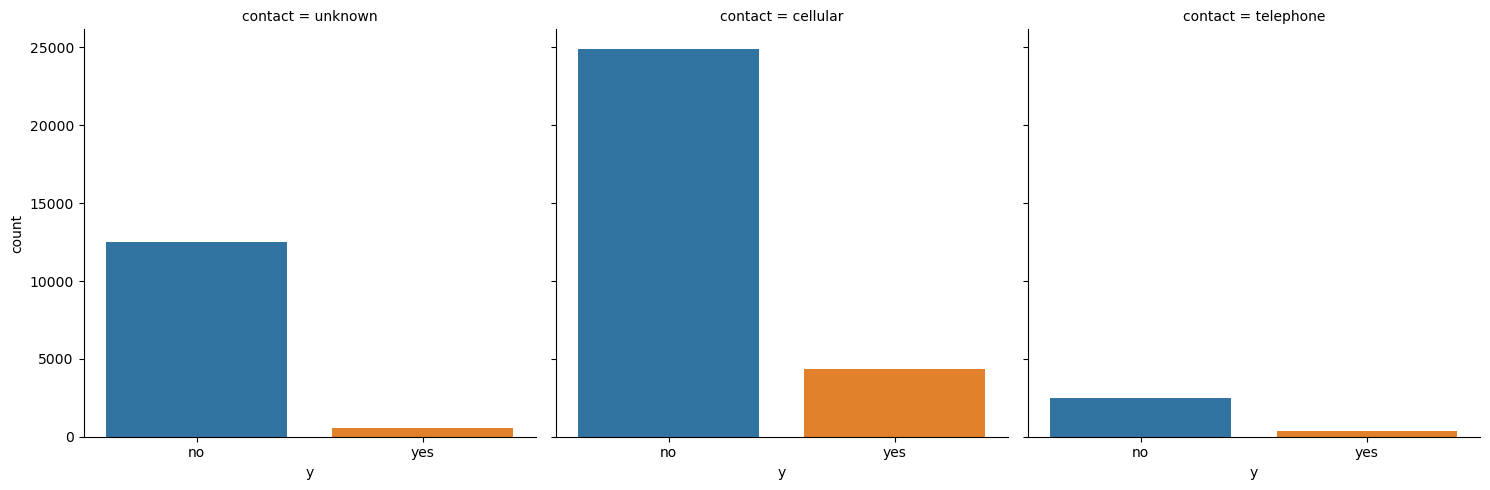

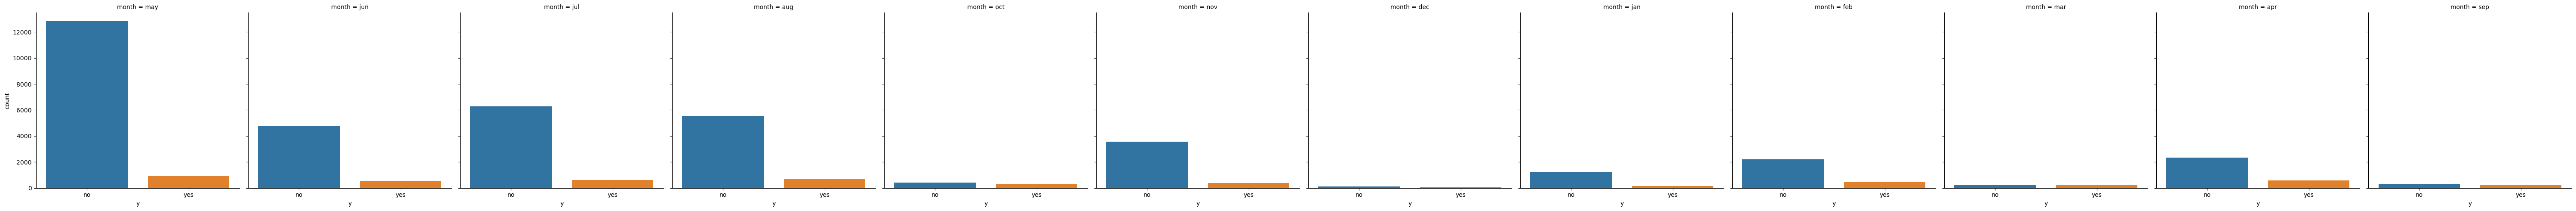

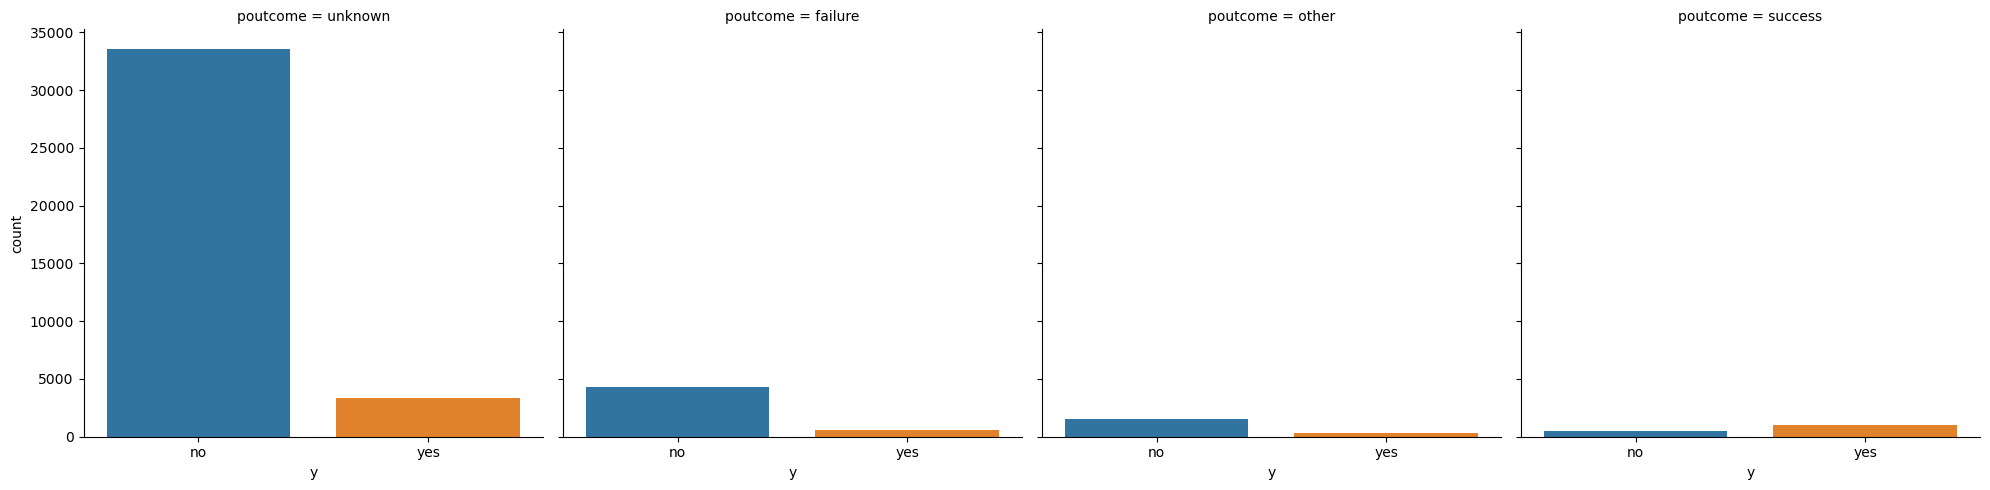

In [17]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [18]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

**My findings**
- 

**7. Explore the Numerical Features**

In [19]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**7 numerical features**

In [20]:
# Find discreate numerical features 

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**My findings**
- no Discrete Variables
- No relation between Discrete numerical Features and output

**10. Find continuous numerical features**

In [21]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


## Univariate analysis of the dataset.

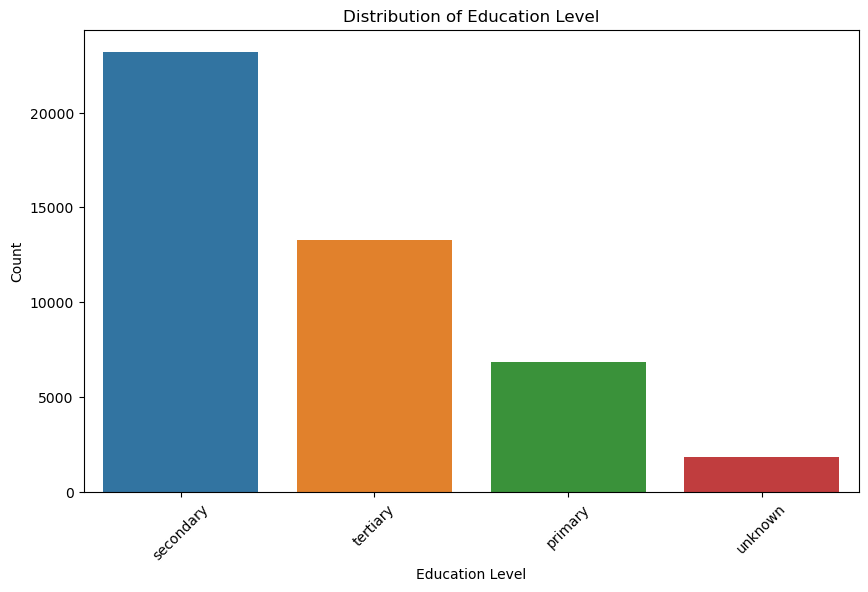

In [22]:
# 2. Education Level

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title("Distribution of Education Level")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

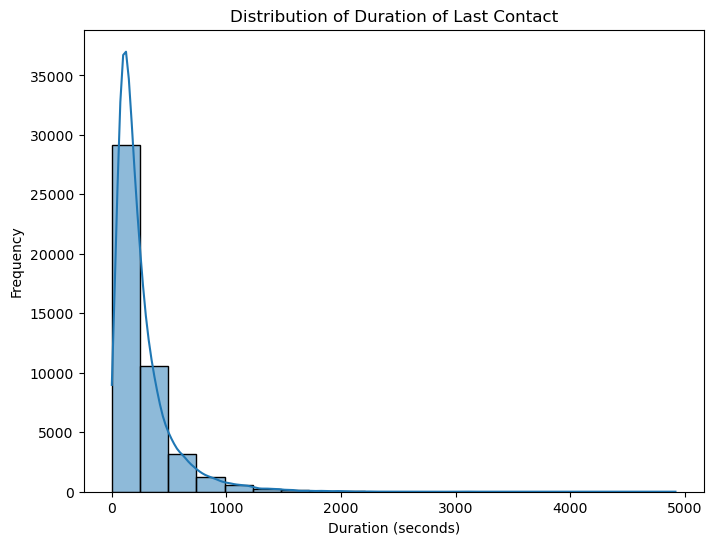

In [23]:
# 4. Duration of Last Contact
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=20, kde=True)
plt.title("Distribution of Duration of Last Contact")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

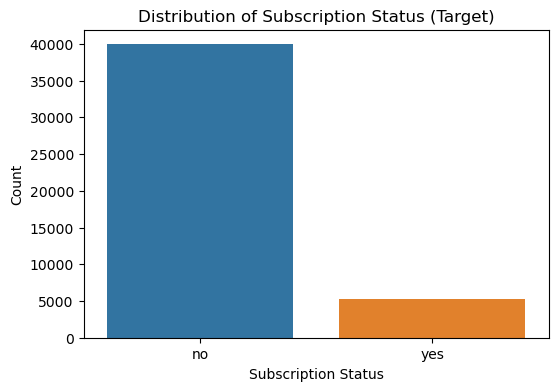

In [24]:
# 3. Subscription Status (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title("Distribution of Subscription Status (Target)")
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.show()

/var/folders/yz/6pc3ydrs64358k175b9gygtm0000gn/T/ipykernel_2143/974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
/var/folders/yz/6pc3ydrs64358k175b9gygtm0000gn/T/ipykernel_2143/974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_featur

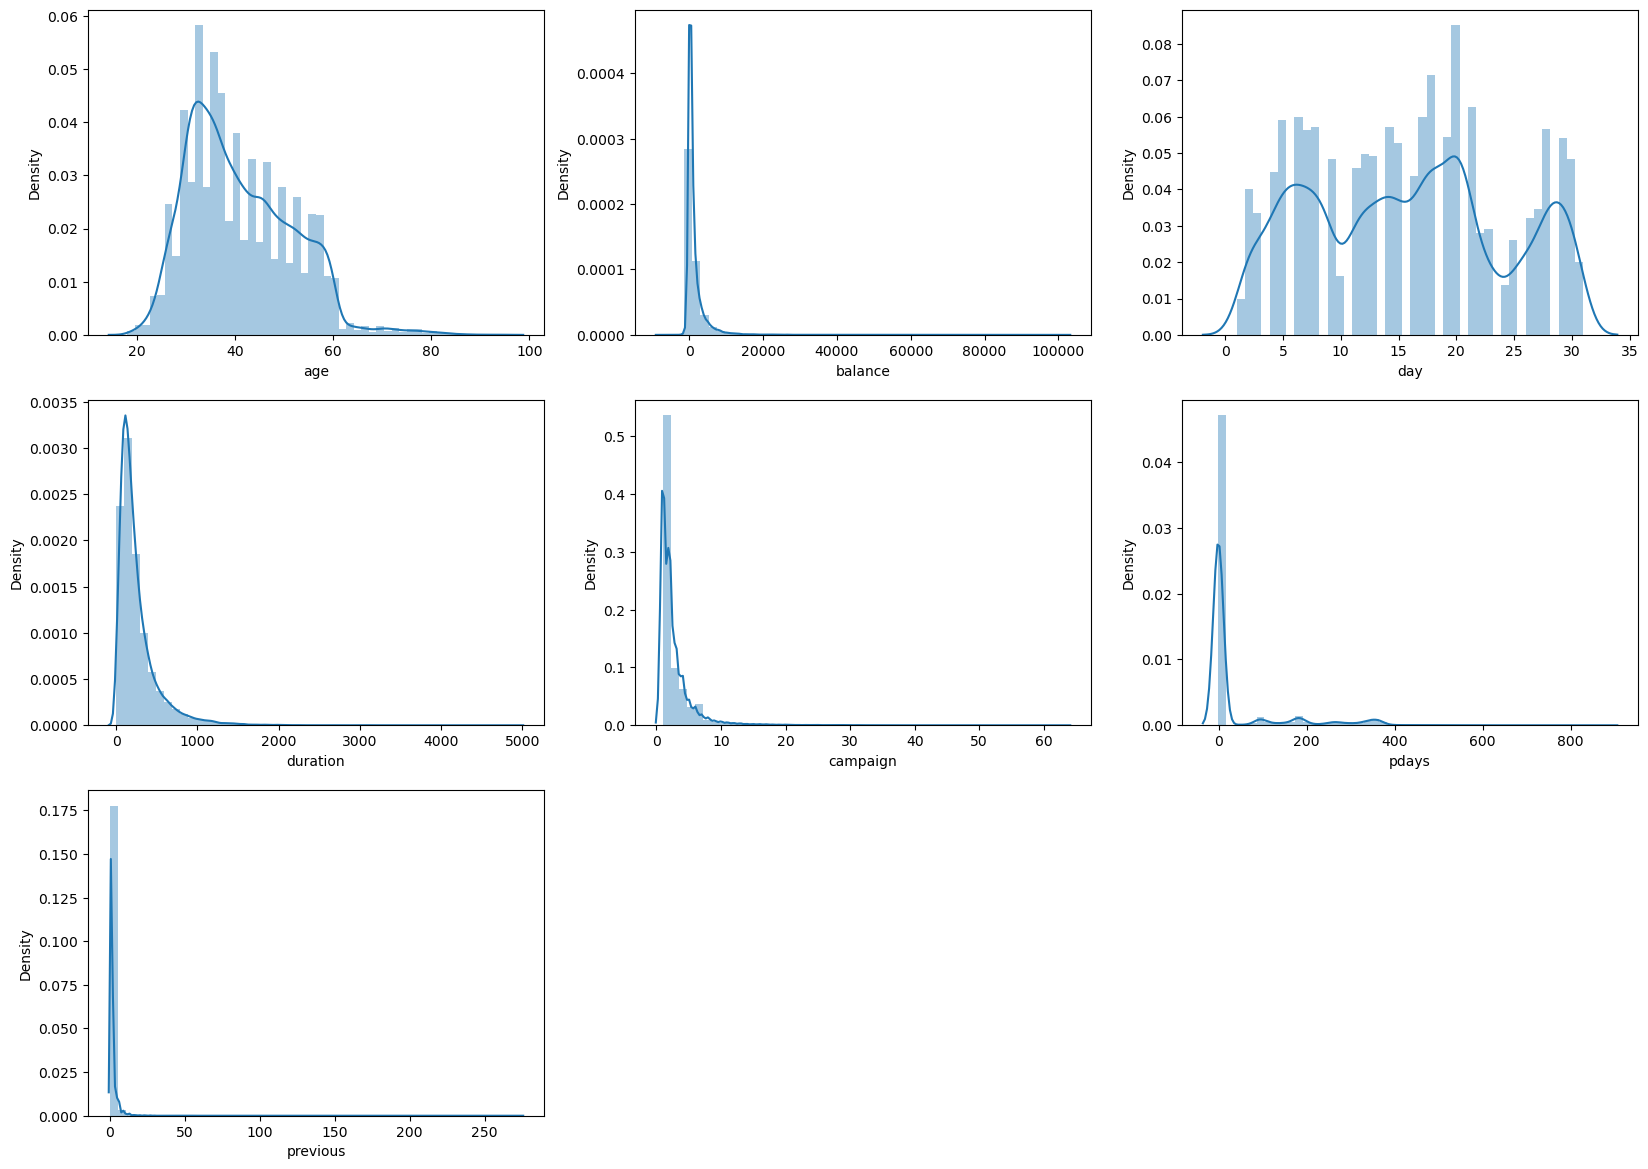

In [25]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**My findings**

- Here 'age' and 'day' feature seems to be distributed normally, whereas the other 5 continuous features may have outliers. 

# Multivariate analysis of the dataset

**Relation between Continous numerical Features and Labels**

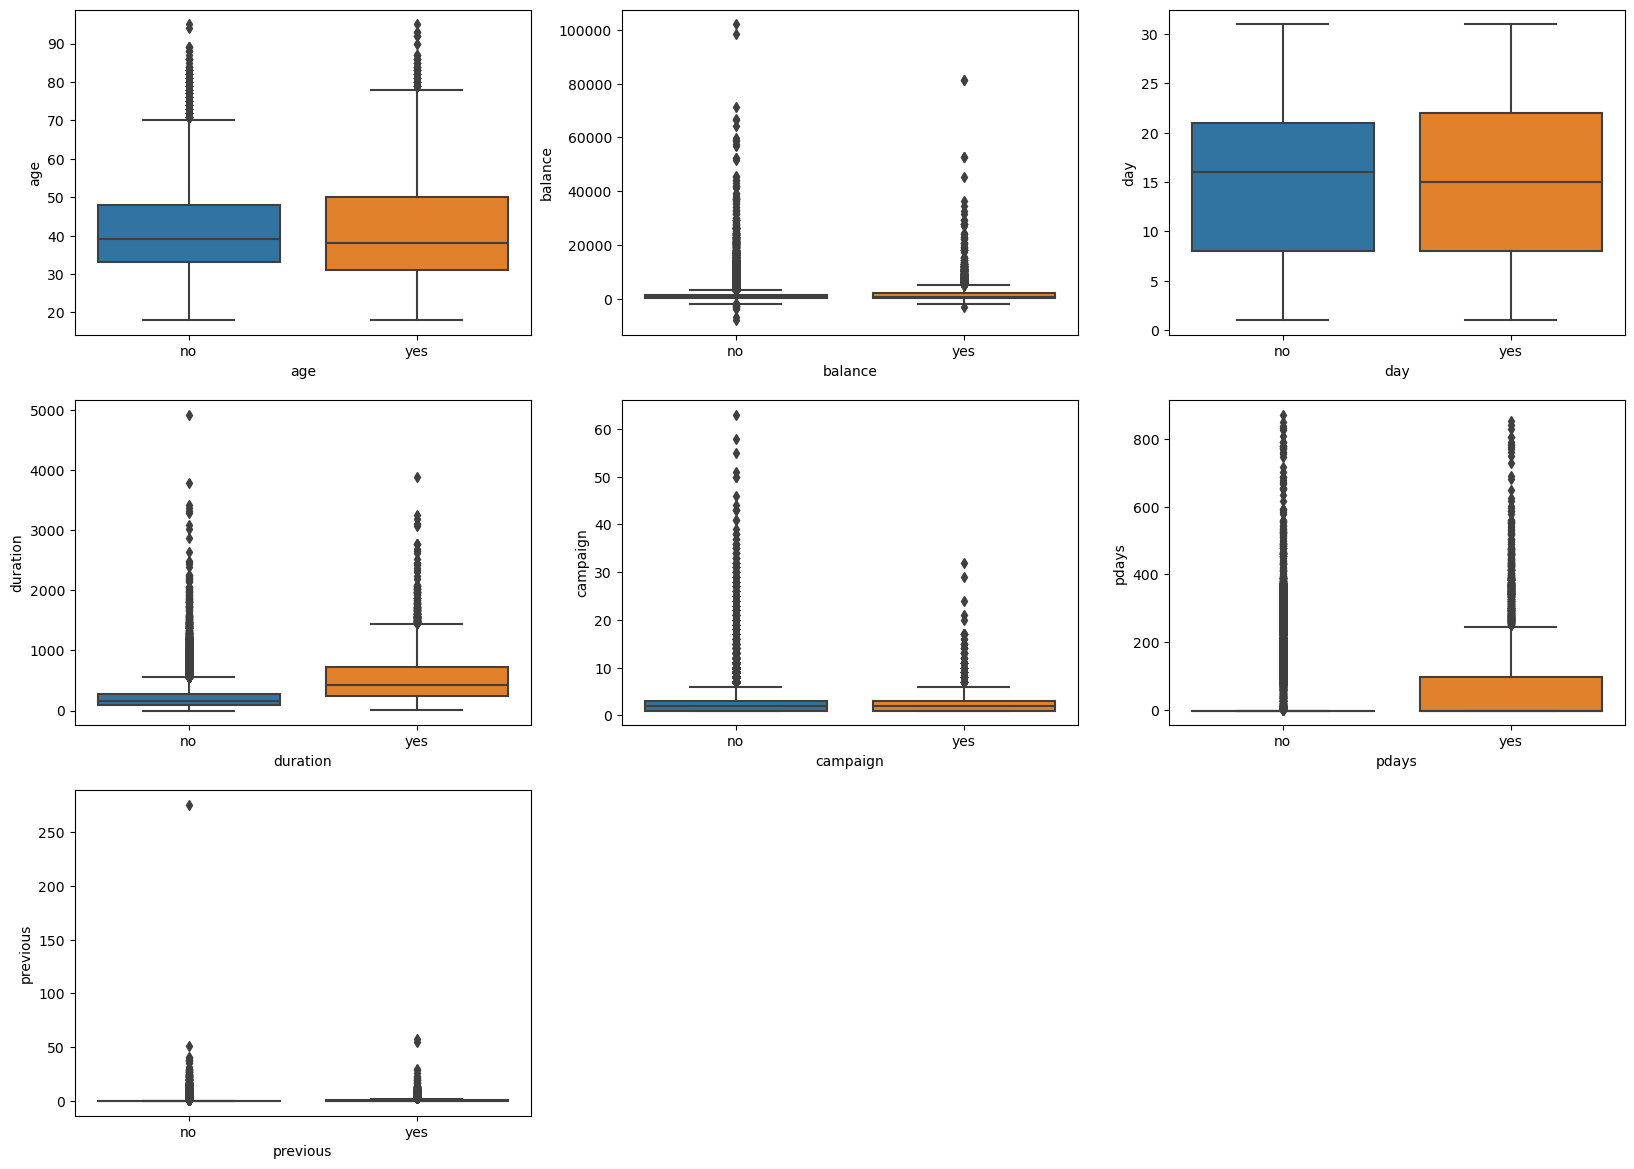

In [26]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**My findings**

- peoples shows interest on deposit who had discussion for longer duration

**Outliers in numerical features**

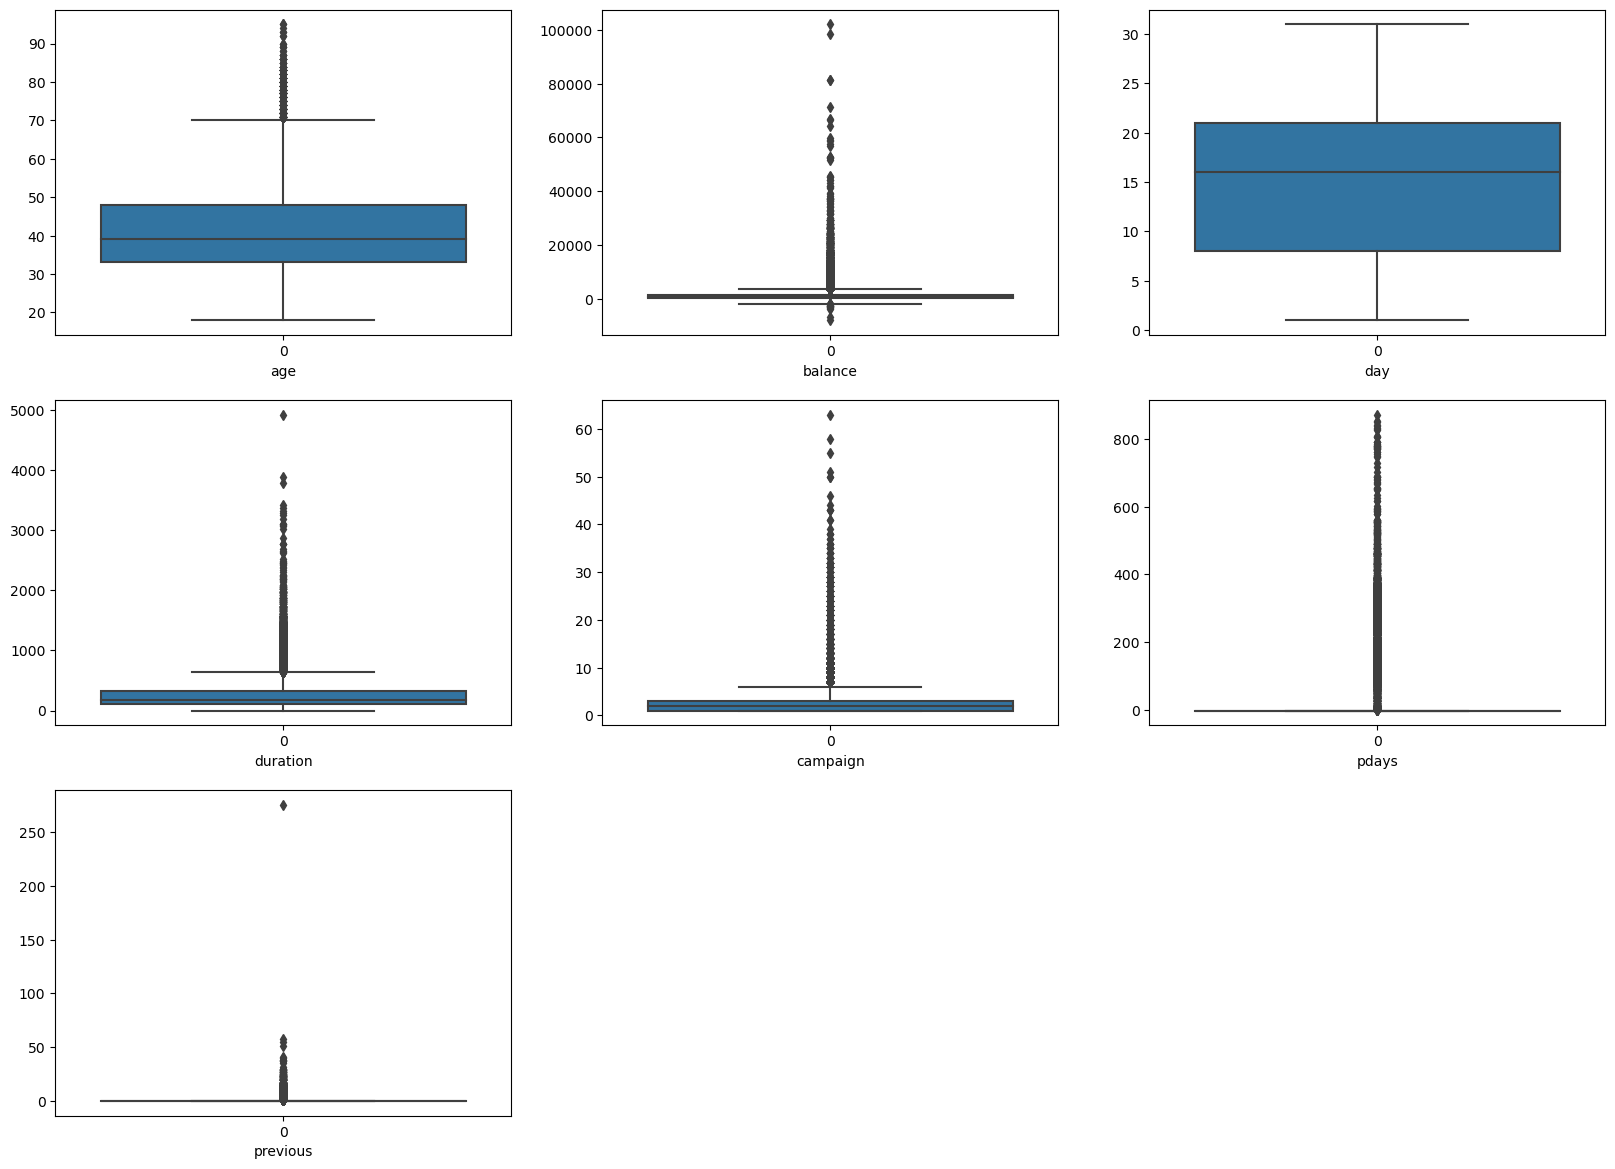

In [27]:
#boxplot on numerical features to find outliers


plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**My findings** 

- age, balance, duration, campaign, pdays and previous has outliers, whereas 'day' has no outlier. 

# correlation matrix

/var/folders/yz/6pc3ydrs64358k175b9gygtm0000gn/T/ipykernel_2143/3313524402.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

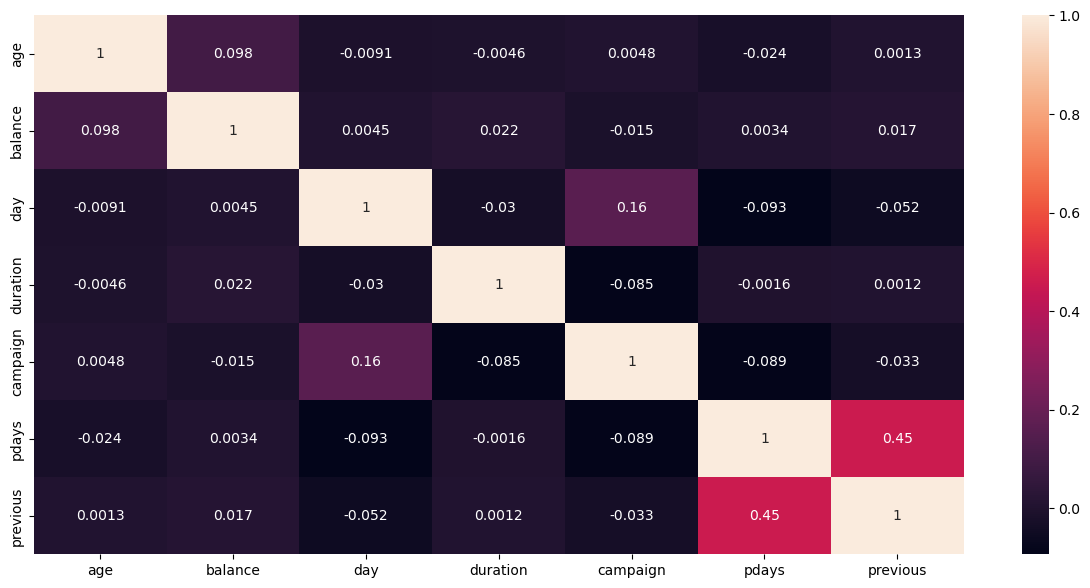

In [28]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**My findings** 

- No feature is highlu correlated. 

## Check the Data set is balanced or not based on target values in classification**

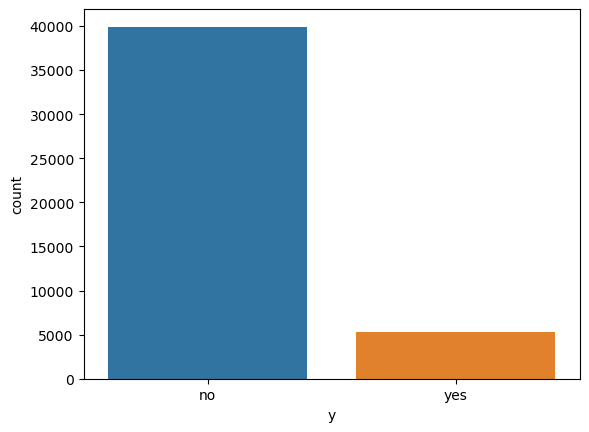

In [29]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df)
plt.show()

In [30]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

**My findings** 

## Dataset is highly imbalanced. I will apply SMOTE technique for balancing the dataset. 

In [31]:
df.corr()

/var/folders/yz/6pc3ydrs64358k175b9gygtm0000gn/T/ipykernel_2143/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## Feature Engineering
- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers
- As per Exploratory Data Analysis EDA, <br> <br>


- no missing value found
- no feature found with one value
- 9 categorical features
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)
- dataset is imbalanced, will handle this
- will handle outliers
- apply one hot encoding
- People those susbcribed for deposit has higher balance

In [32]:
df2 = df.copy()

In [33]:
df2.shape

(45211, 17)

In [34]:
df2.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29072,36,unemployed,married,secondary,no,533,yes,no,cellular,2,feb,619,1,272,1,failure,no
7144,43,management,married,unknown,no,5172,yes,no,unknown,29,may,57,3,-1,0,unknown,no
25833,45,self-employed,married,secondary,no,3080,no,no,cellular,19,nov,296,1,-1,0,unknown,no
29904,38,blue-collar,married,secondary,no,814,yes,no,cellular,4,feb,306,1,-1,0,unknown,no
26310,45,management,married,tertiary,no,96,yes,no,cellular,20,nov,167,1,127,1,failure,no


In [35]:
# Converting yes and no to numerical values 
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df2[col+'_new']=df2[col].apply(lambda x : 1 if x == 'yes' else 0)
    df2.drop(col, axis=1, inplace=True)


In [36]:
df2.head()

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,no,2143,unknown,5,may,261,1,-1,0,unknown,1,0,0
1,44,technician,single,secondary,no,29,unknown,5,may,151,1,-1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,no,2,unknown,5,may,76,1,-1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,no,1506,unknown,5,may,92,1,-1,0,unknown,1,0,0
4,33,unknown,single,unknown,no,1,unknown,5,may,198,1,-1,0,unknown,0,0,0


/var/folders/yz/6pc3ydrs64358k175b9gygtm0000gn/T/ipykernel_2143/3512389367.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df2.corr().round(2)


<Axes: >

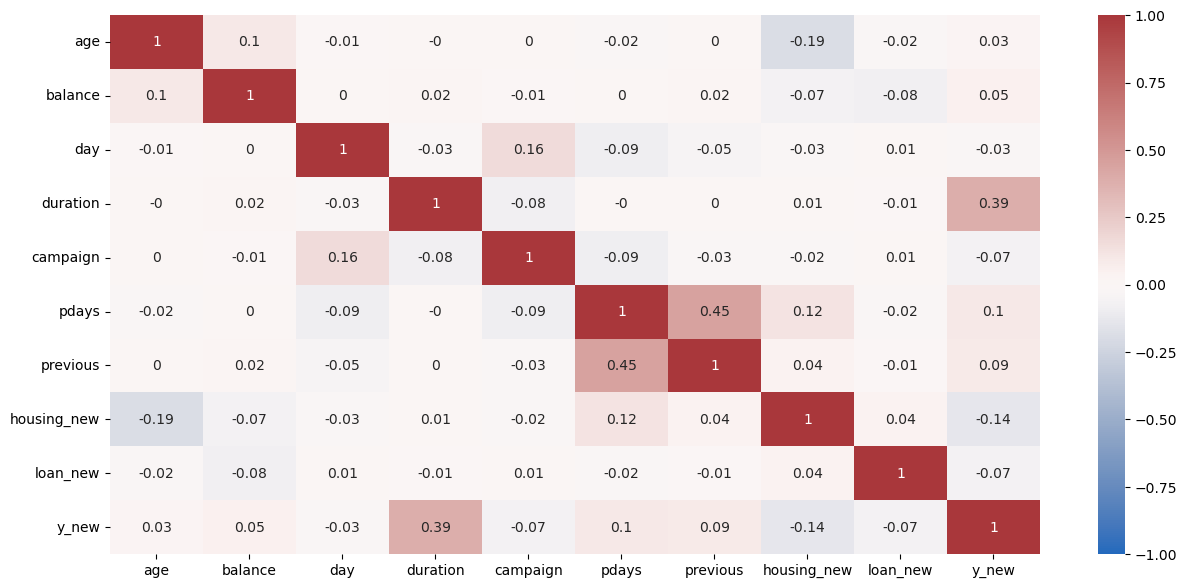

In [37]:
## Checking for correlation
cor_mat=df2.corr().round(2)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True, vmin= -1, vmax = 1, center = 0, cmap = 'vlag')

In [38]:
#defaut features does not play important role
df2.groupby(['y_new','default']).size()

y_new  default
0      no         39159
       yes          763
1      no          5237
       yes           52
dtype: int64

In [39]:
#dropping default feature
df2.drop(['default'],axis=1, inplace=True)

In [40]:
df2.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0


In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Removing outliers in numerical features

In [42]:
# pdays
df2.groupby(['y_new','pdays']).size()


y_new  pdays
0      -1       33570
        1           9
        2          35
        3           1
        4           1
                ...  
1       804         1
        805         1
        828         1
        842         1
        854         1
Length: 914, dtype: int64

In [43]:
# pdays have -1 = 33570 times, which does not have any significant meaning. So dropping this column. 

df2.drop(['pdays'],axis=1, inplace=True)


In [44]:
df2.sample(5)

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
12608,32,admin.,single,tertiary,-59,unknown,4,jul,192,1,0,unknown,0,1,0
34661,59,blue-collar,married,secondary,5314,cellular,5,may,200,3,0,unknown,1,0,0
19602,35,entrepreneur,married,tertiary,753,cellular,7,aug,187,4,0,unknown,0,0,0
44364,26,technician,single,secondary,1873,cellular,2,aug,1013,3,2,other,0,0,0
16181,26,blue-collar,single,secondary,1,cellular,22,jul,36,2,0,unknown,1,0,0


In [45]:
df2.shape

(45211, 15)

In [46]:
df.shape

(45211, 17)

# Handling outliers

In [47]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [48]:
# Balance 

len(df[df['balance']<0])/len(df)

0.08329831235761209

In [49]:
len(df2[df2['balance']<0])/len(df2)


0.08329831235761209

In [50]:
df2[(df2['balance']>40000)|(df2['balance']<0)]


,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
25,44,admin.,married,secondary,-372,unknown,5,may,172,1,0,unknown,1,0,0
28,46,management,single,secondary,-246,unknown,5,may,255,2,0,unknown,1,0,0
36,25,blue-collar,married,secondary,-7,unknown,5,may,365,1,0,unknown,1,0,0
37,53,technician,married,secondary,-3,unknown,5,may,1666,1,0,unknown,0,0,0
45,36,admin.,single,primary,-171,unknown,5,may,242,1,0,unknown,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,-205,cellular,1,sep,481,1,1,failure,0,0,1
44629,28,blue-collar,single,secondary,-46,cellular,1,sep,199,1,14,success,1,0,1
44836,33,blue-collar,married,primary,-195,unknown,20,sep,9,1,0,unknown,0,0,0
44908,48,management,divorced,tertiary,-130,cellular,29,sep,110,2,9,failure,1,0,0


### Dropping negetive values of balance

- Bank balace should not be negative
- There are some records with negative balance and very high balance which acts as major outliers
- So we will drop this

In [51]:
df2.drop(df2[(df2['balance']>40000)|(df2['balance']<0)].index,inplace=True,axis=0)

In [52]:
df2

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,2143,unknown,5,may,261,1,0,unknown,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,0,unknown,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,0,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,0,unknown,0,0,1
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,0,unknown,0,0,1
45208,72,retired,married,secondary,5715,cellular,17,nov,1127,5,3,success,0,0,1
45209,57,blue-collar,married,secondary,668,telephone,17,nov,508,4,0,unknown,0,0,0


In [53]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [56]:
# 3. Duration 

df2[df2['duration']>3000]


,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
2386,45,blue-collar,married,secondary,66,unknown,13,may,3366,3,0,unknown,1,0,0
4382,34,blue-collar,married,primary,183,unknown,19,may,3078,4,0,unknown,1,0,0
6451,44,services,divorced,secondary,51,unknown,27,may,3094,2,0,unknown,1,1,1
9947,59,management,married,secondary,1321,unknown,9,jun,3881,3,0,unknown,0,0,1
19639,37,blue-collar,married,tertiary,359,cellular,7,aug,3422,2,0,unknown,0,1,0
21113,43,self-employed,married,tertiary,423,cellular,14,aug,3322,2,0,unknown,0,0,0
24095,30,admin.,married,secondary,1310,telephone,27,oct,3284,1,0,unknown,0,0,0
24148,59,technician,married,tertiary,6573,telephone,10,nov,4918,1,0,unknown,1,0,0
28872,59,unemployed,married,primary,0,cellular,30,jan,3025,2,0,unknown,0,0,0
30747,53,admin.,married,secondary,849,cellular,6,feb,3102,3,0,unknown,1,0,1


In [57]:
# Dropping records as duration grater than 3000 which acts as a major outlier

df2.drop(df2[df2['duration']>3000].index,inplace=True,axis=0)


In [61]:
# 4. Campaign 

df2[df2['campaign']>30]


,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
3331,50,entrepreneur,married,primary,461,unknown,15,may,651,32,0,unknown,1,0,1
3483,59,management,married,tertiary,2319,unknown,15,may,132,32,0,unknown,1,0,0
3529,53,blue-collar,married,secondary,1140,unknown,15,may,241,32,0,unknown,1,0,0
4020,42,self-employed,married,tertiary,1932,unknown,16,may,192,32,0,unknown,1,0,0
4299,30,management,single,tertiary,358,unknown,19,may,88,51,0,unknown,1,0,0
4330,45,management,married,unknown,9051,unknown,19,may,124,63,0,unknown,1,0,0
4334,42,blue-collar,married,primary,170,unknown,19,may,51,41,0,unknown,1,0,0
5073,35,technician,married,secondary,432,unknown,21,may,1094,55,0,unknown,1,0,0
5459,35,blue-collar,married,secondary,430,unknown,23,may,147,50,0,unknown,1,0,0
5721,48,management,single,tertiary,145,unknown,26,may,14,38,0,unknown,1,0,0


In [62]:
# Drop major outliers of compaign column

df2.drop(df2[df2['campaign']>30].index,axis=0,inplace=True)


In [63]:
# 5. Poutcome and previous 

df2[df2['poutcome']=='unknown']


,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,2143,unknown,5,may,261,1,0,unknown,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,0,unknown,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,0,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,113,cellular,17,nov,266,1,0,unknown,0,0,1
45205,25,technician,single,secondary,505,cellular,17,nov,386,2,0,unknown,0,1,1
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,0,unknown,0,0,1
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,0,unknown,0,0,1


In [65]:
df2[df2['previous']==0]


,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,2143,unknown,5,may,261,1,0,unknown,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,0,unknown,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,0,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,113,cellular,17,nov,266,1,0,unknown,0,0,1
45205,25,technician,single,secondary,505,cellular,17,nov,386,2,0,unknown,0,1,1
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,0,unknown,0,0,1
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,0,unknown,0,0,1


In [66]:
df[df['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


### Already dropped pdays column

- no previous contact so previous ==0 and poutcomes is unknown for all -1 values of pdays

In [67]:
# 5. previous 

df2[df2['previous']>30]


,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
26668,51,entrepreneur,married,secondary,653,cellular,20,nov,16,9,37,other,1,0,0
28498,49,management,single,tertiary,145,cellular,29,jan,57,2,38,failure,1,0,0
28886,31,management,single,tertiary,358,cellular,30,jan,68,3,51,failure,1,0,0
29182,40,management,married,tertiary,543,cellular,2,feb,349,2,275,other,1,0,0
37567,39,management,married,tertiary,0,cellular,14,may,11,15,38,failure,1,0,0
38326,46,blue-collar,married,primary,1085,cellular,15,may,523,2,58,other,1,1,1
39141,44,admin.,married,secondary,429,cellular,18,may,35,3,32,failure,1,1,0
42422,27,student,single,secondary,91,telephone,4,dec,157,6,37,other,0,0,0
42611,35,technician,single,secondary,4645,cellular,11,jan,502,3,40,other,1,0,0
44089,37,technician,married,secondary,432,cellular,6,jul,386,3,55,failure,1,0,1


In [68]:
# drop outliers in previous column 

df2.drop(df2[df2['previous']>30].index,axis=0,inplace=True)


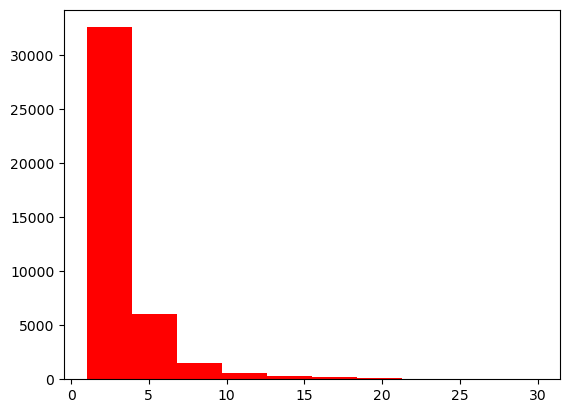

In [69]:
plt.hist(x="campaign",data=df2,color='red')
plt.show()

In [70]:
df2

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,2143,unknown,5,may,261,1,0,unknown,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,0,unknown,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,0,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,0,unknown,0,0,1
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,0,unknown,0,0,1
45208,72,retired,married,secondary,5715,cellular,17,nov,1127,5,3,success,0,0,1
45209,57,blue-collar,married,secondary,668,telephone,17,nov,508,4,0,unknown,0,0,0


## My findings 

- Campaign must be less, less campaign more term deposit subscripsion 
- duration is the most favorite feature, higher the duration more the chances that person will subscrised for deposit 
- clients with higher balance subscribed for term deposit most 
- pdays and default column dropped 

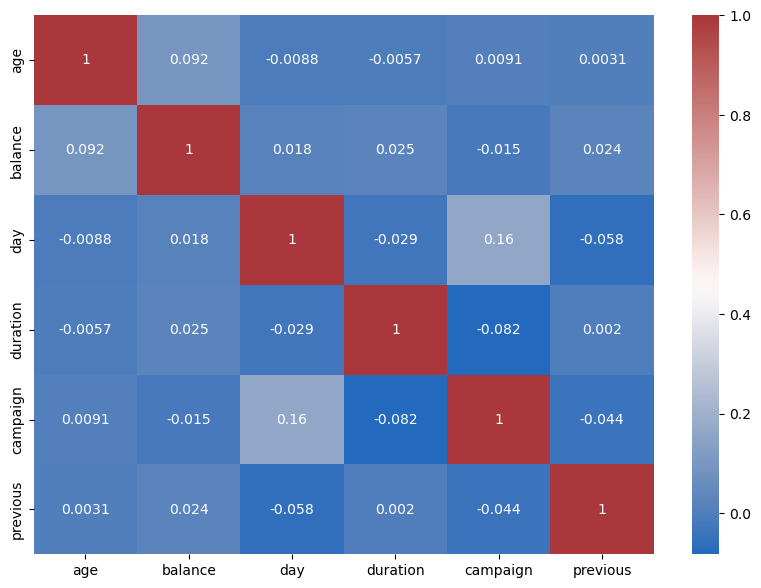

In [74]:
df_num = df2[['age', 'balance', 'day', 'duration', 'campaign', 'previous',]]
plt.figure(figsize=(10,7))
sns.heatmap(data=df_num.corr(), annot=True, cmap = 'vlag')
plt.show()

# converting catagorical features to numerical features 

- There are two types of categorical variable, nominal and ordinal. A nominal variable has no intrinsic ordering to its categories. For example, housing is a categorical variable having two categories (yes and no) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering.


In [76]:
df3 = df2.copy()

df3

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
0,58,management,married,tertiary,2143,unknown,5,may,261,1,0,unknown,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,0,unknown,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,0,unknown,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,0,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,0,unknown,0,0,1
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,0,unknown,0,0,1
45208,72,retired,married,secondary,5715,cellular,17,nov,1127,5,3,success,0,0,1
45209,57,blue-collar,married,secondary,668,telephone,17,nov,508,4,0,unknown,0,0,0


In [77]:
# Importing libraries for encoding 


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [78]:
# Ordinal Encoding for Month , contact, poutcome - 


l=['month',"contact","poutcome"]
for i in l:
    le=LabelEncoder()
    df2[i]=le.fit_transform(df2[i].values)


In [81]:
df2.sample(5)

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,y_new
5455,39,services,married,secondary,104,2,23,8,138,6,0,3,1,0,0
42402,39,services,married,secondary,323,0,3,2,1804,3,3,1,0,0,0
18926,54,technician,married,secondary,369,0,4,1,226,1,0,3,0,0,0
6689,38,technician,married,secondary,133,2,28,8,156,1,0,3,1,0,0
27701,36,technician,married,tertiary,4932,0,21,9,273,5,0,3,1,0,0


In [82]:
# OneHot Encoding for Job, marital and education 

df2 = pd.get_dummies(df2, columns = ['job','marital','education'])

In [83]:
df2

,age,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,2143,2,5,8,261,1,0,3,1,...,0,0,0,0,1,0,0,0,1,0
1,44,29,2,5,8,151,1,0,3,1,...,1,0,0,0,0,1,0,1,0,0
2,33,2,2,5,8,76,1,0,3,1,...,0,0,0,0,1,0,0,1,0,0
3,47,1506,2,5,8,92,1,0,3,1,...,0,0,0,0,1,0,0,0,0,1
4,33,1,2,5,8,198,1,0,3,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,17,9,977,3,0,3,0,...,1,0,0,0,1,0,0,0,1,0
45207,71,1729,0,17,9,456,2,0,3,0,...,0,0,0,1,0,0,1,0,0,0
45208,72,5715,0,17,9,1127,5,3,2,0,...,0,0,0,0,1,0,0,1,0,0
45209,57,668,1,17,9,508,4,0,3,0,...,0,0,0,0,1,0,0,1,0,0
